### Testing of visualization of molecules with respects to descriptors

In [3]:
import pandas as pd
import rdkit as rdkit
from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors
from rdkit.Chem import rdMolDescriptors
from rdkit import *
from rdkit.Chem import PandasTools
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import plotly.graph_objects as go
import plotly_express as px
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import SimilarityMaps


import os
path = "/Notebooks/data/"
os.chdir(path)

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/Notebooks/data/'

C:\Users\meide\.conda\envs\rdkit\lib\site-packages\rdkit\Chem\Draw\SimilarityMaps.py:224: UserWarning: The following kwargs were not used by contour: 'colormap'
  contourset = fig.axes[0].contour(x, y, z, contourLines, colors=colors, alpha=alpha, **kwargs)


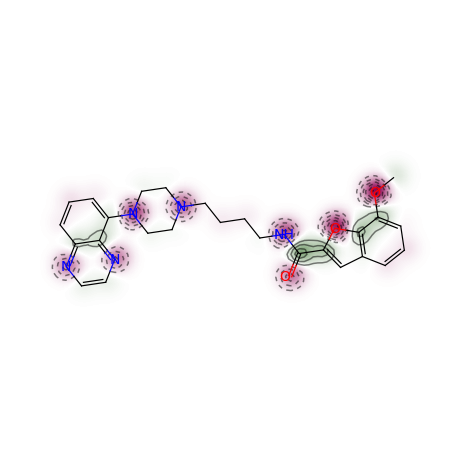

In [19]:
mol = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')

AllChem.ComputeGasteigerCharges(mol)


contribs = [mol.GetAtomWithIdx(i).GetDoubleProp('_GasteigerCharge') for i in range(mol.GetNumAtoms())]


fig = SimilarityMaps.GetSimilarityMapFromWeights(mol, contribs, colormap="jet", contourLines =10)

In [5]:
df = pd.read_csv("chemical_descriptors.csv")

In [17]:
mol_list = []

for i in df.InChI:
    mol = Chem.MolFromInchi(i)
    mol_list.append(mol)

In [26]:
mol2 = mol_list[7]
AllChem.ComputeGasteigerCharges(mol2)



In [27]:
contribs2 = [mol2.GetAtomWithIdx(i).GetDoubleProp('_GasteigerCharge') for i in range(mol2.GetNumAtoms())]

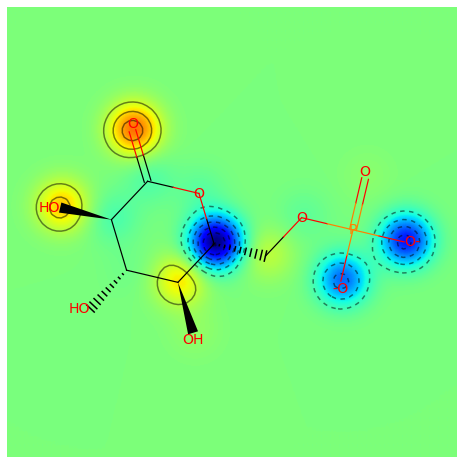

In [37]:
mol2 = mol_list[5]
AllChem.ComputeGasteigerCharges(mol2)
contribs2 = [mol2.GetAtomWithIdx(i).GetDoubleProp('_GasteigerCharge') for i in range(mol2.GetNumAtoms())]
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol2, contribs, colorMap='jet', contourLines=10)

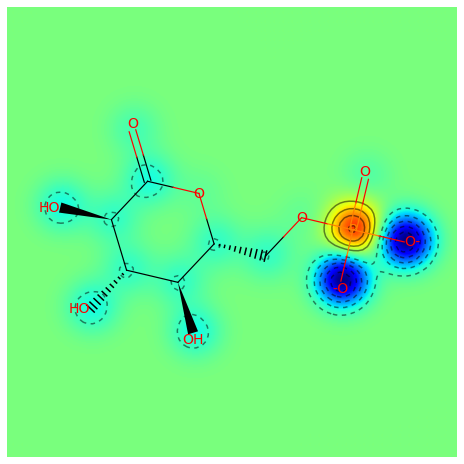

In [38]:
from rdkit.Chem import rdMolDescriptors
contribs2 = rdMolDescriptors._CalcCrippenContribs(mol2)
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol2,[x for x,y in contribs2], colorMap='jet', contourLines=10)

In [39]:
rdMolDescriptors.CalcCrippenDescriptors

AttributeError: module 'rdkit.Chem.rdMolDescriptors' has no attribute '_descList'

In [10]:
dfMol = pd.read_csv("1515.csv")

SMILES_list = dfMol['SMILES'].tolist()
SMILES_list

['[H+]',
 'NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)([O-])OP(=O)([O-])OC[C@H]3O[C@@H](n4cnc5c(N)ncnc54)[C@H](O)[C@@H]3O)[C@@H](O)[C@H]2O)C=CC1',
 'CC(C)=CCC/C(C)=C/COP(=O)([O-])OP(=O)([O-])[O-]',
 'CCCC=O',
 'C[C@@H]1NC(=O)N[C@@H]1CCCCCC(=O)[O-]',
 'CCCCCCCCCC(=O)[O-]',
 'O=C([O-])[C@@H](O)[C@@H](O)[C@H](O)[C@H](O)CO',
 'CC(=O)N[C@@H](CCC=O)C(=O)[O-]',
 'O=N[O-]',
 'CCCCCCCCCCCCCCCC(=O)[O-]',
 'NC(=O)NC(=O)C(=O)[O-]',
 'Nc1nc2c(c(=O)[nH]1)N(C=O)[C@@H](CNc1ccc(C(=O)N[C@@H](CCC(=O)[O-])C(=O)[O-])cc1)CN2',
 'O=C([O-])/C=C(/CC(=O)[O-])C(=O)[O-]',
 'COc1cc(/C=C/C(=O)CC(=O)/C=C/c2ccc(O)c(OC)c2)ccc1O',
 'CCCCCCCCCC(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(C)(C)COP(=O)([O-])OP(=O)([O-])OC[C@H]1O[C@@H](n2cnc3c(N)ncnc32)[C@H](O)[C@@H]1OP(=O)([O-])[O-]',
 'C[C@H](CCC(=O)[O-])[C@H]1CC[C@H]2[C@@H]3C(=O)C[C@@H]4C[C@H](O)CC[C@]4(C)[C@H]3C[C@H](O)[C@@]21C',
 '[F-]',
 '[NH3+][C@@H](CCC=O)C(=O)[O-]',
 'C[C@@H](O)C(=O)SC[C@H](NC(=O)CC[C@H]([NH3+])C(=O)[O-])C(=O)NCC(=O)[O-]',
 'OCCS',
 'CCCCCC(=O)CC(=O)SCCNC(=O)CCNC(=O)[C@H

In [9]:
from rdkit import *
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import *
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit import rdBase
from rdkit import ML
import numpy as np
import pandas as pd

import os
#path = "data/"
#os.chdir(path)

dfMol = pd.read_csv("1515.csv")

SMILES_list = dfMol['SMILES'].tolist()

GEM_draw = []
for SMILES in SMILES_list:
    mol = Chem.MolFromSmiles(SMILES)
    GEM_draw.append(mol)




img1515 = Draw.MolsToGridImage(GEM_draw, molsPerRow = 3, useSVG = True)

img1515

#img1515().save('1515.svg')

TypeError: No registered converter was able to produce a C++ rvalue of type class std::basic_string<wchar_t,struct std::char_traits<wchar_t>,class std::allocator<wchar_t> > from this Python object of type float